# BibRec: Data Normalization

## Basic Data Cleaning

In [2]:
from bibrec.server.Utils import *
import seaborn as sns

In [3]:
books = get_books(books_path='data/BX-Books.csv')
users = get_users(users_path='data/BX-Users.csv')
ratings = get_ratings(books, ratings_path='data/BX-Book-Ratings.csv', explicit_only=False)

/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:34: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:119: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


### Books

In [4]:
books

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215
...,...,...,...,...,...,...,...,...,...
270939,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095
270940,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763
270941,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671
270942,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270944 entries, 0 to 270943
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 270944 non-null  object
 1   book_title           270944 non-null  object
 2   book_author          270943 non-null  object
 3   year_of_publication  270944 non-null  int16 
 4   publisher            270942 non-null  object
 5   image_url_s          270944 non-null  object
 6   image_url_m          270944 non-null  object
 7   image_url_l          270944 non-null  object
 8   isbn13               270944 non-null  object
dtypes: int16(1), object(8)
memory usage: 17.1+ MB


In [6]:
books.describe()

,year_of_publication
count,270944.000000
mean,1993.114920
std,9.320961
min,1376.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2005.000000


<AxesSubplot: >

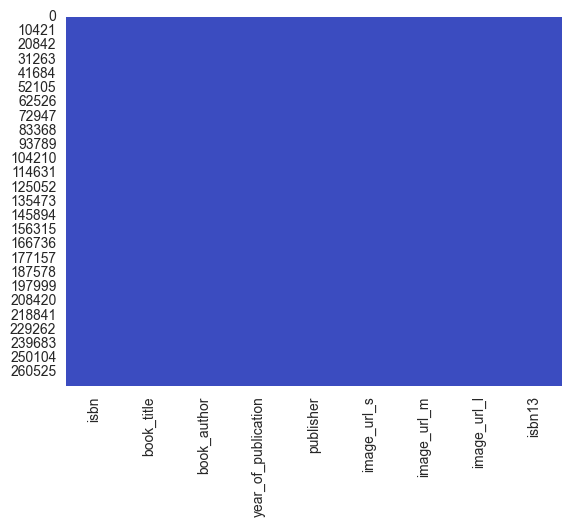

In [7]:
sns.heatmap(books.isnull(), cbar = False, cmap='coolwarm')

### Users

In [8]:
users

,user_id,age,city,state,country
0,1,19.193343,nyc,new york,usa
1,2,18.000000,stockton,california,usa
2,3,28.849379,moscow,yukon territory,russia
3,4,17.000000,porto,v.n.gaia,portugal
4,5,33.411029,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,34.767306,portland,oregon,usa
278854,278855,50.000000,tacoma,washington,united kingdom
278855,278856,43.070347,brampton,ontario,canada
278856,278857,48.618607,knoxville,tennessee,usa


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  278858 non-null  int64  
 1   age      278858 non-null  float64
 2   city     278736 non-null  object 
 3   state    278605 non-null  object 
 4   country  274295 non-null  string 
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 10.6+ MB


In [10]:
users.describe()

,user_id,age
count,278858.00000,278858.000000
mean,139429.50000,34.897962
std,80499.51502,13.853958
min,1.00000,0.000084
25%,69715.25000,24.878438
50%,139429.50000,33.000000
75%,209143.75000,44.000000
max,278858.00000,110.000000


<AxesSubplot: >

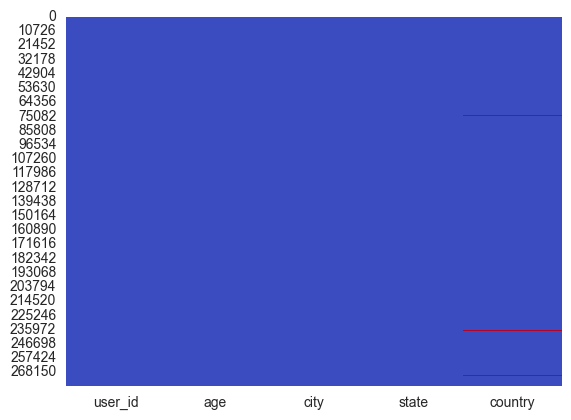

In [11]:
sns.heatmap(users.isnull(), cbar = False, cmap='coolwarm')

### Ratings

In [12]:
ratings

,user_id,isbn,book_rating,isbn13
0,276725,034545104X,0,9780345451040
1,276726,0155061224,5,9780155061224
2,276727,0446520802,0,9780446520805
3,276729,052165615X,3,9780521656153
4,276729,0521795028,6,9780521795029
...,...,...,...,...
1149774,276704,0876044011,0,978087604401
1149775,276704,1563526298,9,9781563526299
1149776,276706,0679447156,0,9780679447153
1149777,276709,0515107662,10,9780515107661


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031387 entries, 0 to 1149778
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1031387 non-null  int64 
 1   isbn         1031387 non-null  object
 2   book_rating  1031387 non-null  int64 
 3   isbn13       1031387 non-null  object
dtypes: int64(2), object(2)
memory usage: 39.3+ MB


In [14]:
ratings.describe()

,user_id,book_rating
count,1.031387e+06,1.031387e+06
mean,1.405968e+05,2.839253e+00
std,8.052512e+04,3.854219e+00
min,2.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00
50%,1.412100e+05,0.000000e+00
75%,2.114260e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


<AxesSubplot: >

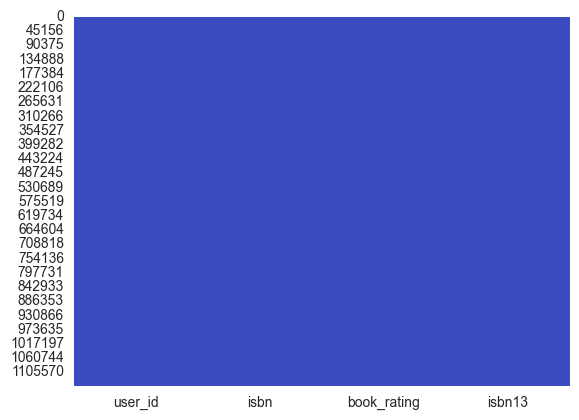

In [15]:
sns.heatmap(ratings.isnull(), cbar = False, cmap='coolwarm')

<AxesSubplot: xlabel='book_rating', ylabel='count'>

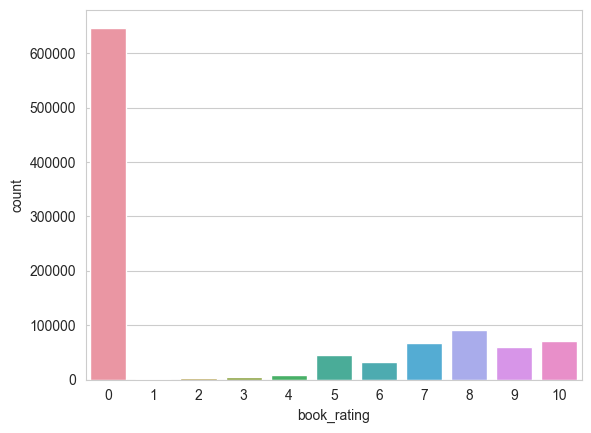

In [16]:
sns.countplot(x=ratings["book_rating"])

## Normalize Dataset

In [17]:
# normalize data
norm_books, norm_users, norm_ratings = normalize_data(books, users, ratings)

In [18]:
# export normalized data to CSV Files
export_normalized_data(norm_books, norm_users, norm_ratings)

(              isbn                                         book_title  \
 0       0195153448                                Classical Mythology   
 1       0002005018                                       Clara Callan   
 2       0060973129                               Decision in Normandy   
 3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
 4       0393045218                             The Mummies of Urumchi   
 ...            ...                                                ...   
 270939  0440400988                         There's a Bat in Bunk Five   
 270940  0525447644                            From One to One Hundred   
 270941  006008667X  Lily Dale : The True Story of the Town that Ta...   
 270942  0192126040                        Republic (World's Classics)   
 270943  0767409752  A Guided Tour of Rene Descartes' Meditations o...   
 
                  book_author  year_of_publication publisher  \
 0         Mark P. O. Morford                 

In [19]:
# load normalized csv files
norm_books, norm_users, norm_ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                                           users_path='data/normalized_users.csv',
                                                           ratings_path='data/normalized_ratings.csv')

### Books

EXPLANATION HERE

In [20]:
norm_books

,Unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,1.0,3
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,4.928571,14.0,4
2,2,0060973129,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,5.000000,3.0,14
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,4.272727,11.0,6
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,270939,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,270940,0525447644,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,270941,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,1.0,1
270942,270942,0192126040,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,1.0,9


In [21]:
norm_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270944 entries, 0 to 270943
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      270944 non-null  int64  
 1   isbn                            270944 non-null  object 
 2   book_title                      270944 non-null  object 
 3   book_author                     270943 non-null  object 
 4   year_of_publication             270944 non-null  int64  
 5   publisher                       270944 non-null  object 
 6   image_url_s                     270944 non-null  object 
 7   image_url_m                     270944 non-null  object 
 8   image_url_l                     270944 non-null  object 
 9   isbn13                          270944 non-null  int64  
 10  rating_mean                     270944 non-null  float64
 11  rating_count                    270944 non-null  float64
 12  normalized_year_

In [22]:
norm_books.describe()

,Unnamed: 0,year_of_publication,isbn13,rating_mean,rating_count,normalized_year_of_publication
count,270944.000000,270944.000000,2.709440e+05,270944.000000,270944.000000,270944.000000
mean,135471.500000,1993.114920,8.959982e+12,2.871698,3.806694,11.885080
std,78214.940005,9.320961,2.575736e+12,3.281596,13.805660,9.320961
min,0.000000,1376.000000,9.782000e+03,0.000000,0.000000,0.000000
25%,67735.750000,1989.000000,9.780373e+12,0.000000,1.000000,5.000000
50%,135471.500000,1995.000000,9.780554e+12,1.800000,1.000000,10.000000
75%,203207.250000,2000.000000,9.780871e+12,5.000000,3.000000,16.000000
max,270943.000000,2005.000000,9.790000e+12,10.000000,2502.000000,629.000000


<AxesSubplot: >

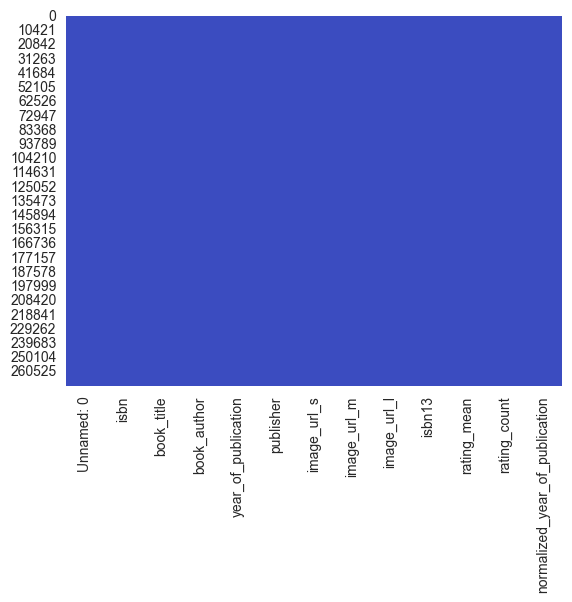

In [23]:
sns.heatmap(norm_books.isnull(), cbar = False, cmap='coolwarm')

### Users

In [ ]:
norm_users

In [ ]:
norm_users.info()

In [ ]:
norm_users.describe()

In [ ]:
sns.heatmap(norm_users.isnull(), cbar = False, cmap='coolwarm')

### Ratings

In [ ]:
norm_ratings

In [ ]:
norm_ratings.info()

In [ ]:
norm_ratings.describe()

In [ ]:
sns.heatmap(norm_ratings.isnull(), cbar = False, cmap='coolwarm')

### Top 20 __Countries__, __States__ and __Publisher__ in Dataset:

EXPLANATION HERE

In [ ]:
get_top_publisher()

In [ ]:
get_top_states()

In [ ]:
# find out top countries
get_top_countries()

## Hot Encoded Dataset

In [ ]:
from bibrec.server.Utils import hot_encode_books, hot_encode_users
encoded_books = hot_encode_books(norm_books)
encoded_books.to_csv('data/encoded_books.csv')

In [ ]:
encoded_users = hot_encode_users(norm_users)
encoded_users.to_csv('data/encoded_users.csv')

In [ ]:
encoded_books.describe()

In [ ]:
encoded_users.describe()